# IMPORT DATA

In [1]:
import os
import pandas as pd

path = os.path.join('C:/Users/191204026/Documents','Telco_customer_churn.csv')
data_df = pd.read_csv(path)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
data_df[['Churn Value']].value_counts()

Churn Value
0              5174
1              1869
Name: count, dtype: int64

In [4]:
new_data = data_df.drop(['Churn Label','Churn Value'],axis=1)
Y = data_df['Churn Value']

In [5]:
total_charges = pd.to_numeric(new_data['Total Charges'], errors='coerce')
#data_df.loc[2234,'Total Charges']
total_charges
new_data.drop('Total Charges',axis=1,inplace=True)
new_data.loc[:,'Total Charges'] = total_charges

In [6]:
new_data.drop('Lat Long',axis=1,inplace=True)

In [7]:
Customer_ID = new_data['CustomerID']
new_data.drop(['CustomerID','Count'],axis=1,inplace=True)

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            7043 non-null   object 
 1   State              7043 non-null   object 
 2   City               7043 non-null   object 
 3   Zip Code           7043 non-null   int64  
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   object 
 12  Multiple Lines     7043 non-null   object 
 13  Internet Service   7043 non-null   object 
 14  Online Security    7043 non-null   object 
 15  Online Backup      7043 non-null   object 
 16  Device Protection  7043 

## Split into training and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, Y, stratify=Y, random_state=10)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 3069 to 1344
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5282 non-null   object 
 1   State              5282 non-null   object 
 2   City               5282 non-null   object 
 3   Zip Code           5282 non-null   int64  
 4   Latitude           5282 non-null   float64
 5   Longitude          5282 non-null   float64
 6   Gender             5282 non-null   object 
 7   Senior Citizen     5282 non-null   object 
 8   Partner            5282 non-null   object 
 9   Dependents         5282 non-null   object 
 10  Tenure Months      5282 non-null   int64  
 11  Phone Service      5282 non-null   object 
 12  Multiple Lines     5282 non-null   object 
 13  Internet Service   5282 non-null   object 
 14  Online Security    5282 non-null   object 
 15  Online Backup      5282 non-null   object 
 16  Device Protection  5282 no

In [11]:
import numpy as np
num_df = X_train.select_dtypes(include=np.number)
cat_df = X_train.select_dtypes(include= object)

## EXPLORING NUMERICALS

In [12]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 3069 to 1344
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Zip Code         5282 non-null   int64  
 1   Latitude         5282 non-null   float64
 2   Longitude        5282 non-null   float64
 3   Tenure Months    5282 non-null   int64  
 4   Monthly Charges  5282 non-null   float64
 5   Churn Score      5282 non-null   int64  
 6   CLTV             5282 non-null   int64  
 7   Total Charges    5273 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 371.4 KB


In [13]:
num_df.describe().T

count          mean          std           min  \
Zip Code         5282.0  93513.138205  1872.201508  90001.000000   
Latitude         5282.0     36.281952     2.449764     32.555828   
Longitude        5282.0   -119.807733     2.157855   -124.301372   
Tenure Months    5282.0     32.489019    24.649445      0.000000   
Monthly Charges  5282.0     64.935735    30.102860     18.250000   
Churn Score      5282.0     58.819765    21.489976      5.000000   
CLTV             5282.0   4408.440742  1182.435221   2003.000000   
Total Charges    5273.0   2295.693818  2278.435269     18.850000   

                          25%           50%           75%           max  
Zip Code         92075.750000  93552.000000  95351.000000  96161.000000  
Latitude            34.036146     36.391777     38.231113     41.962127  
Longitude         -121.834085   -119.739935   -118.053753   -114.192901  
Tenure Months        9.000000     29.000000     56.000000     72.000000  
Monthly Charges     35.900000     70.350000     89.950000    118.750000  
Churn Score         41.000000     61.000000     75.000000    100.000000  
CLTV              3491.000000   4534.500000   5389.500000   6499.000000  
Total Charges      400.000000   1411.650000   3846.350000   8684.800000

### Exploring correlations

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def num_plotter(df):
    """"
    This function accepts a dataframe and plots
    histograms using seaborn on a figure created
    with matplotlib

    """
    
    for col in df.columns:
        plt.figure(figsize=(7,7))
        sns.histplot(df[col])

def corr_plotter(df, label,label_name):
    """"
    This function accepts a dataframe, creates a 
    correlation dataframe and plots a heatmap using
    seaborn on a figure created with matplotlib

    """
    #new_label = str(label_name)
    new_df = df.copy()
    new_df.loc[:,label_name] = label
    corr_df = new_df.corr()
    #corr_df[label_name].sort_values(ascending=True)
    plt.figure(figsize=(7,7))
    ax = sns.heatmap(corr_df, 
                     cmap=sns.diverging_palette(300,150, n=50),
                     #vmin=-1, vmax=1, #center=0,
                     square = True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    #horizontalalignment = 'right'
    
def pairplotter(df, label, label_name):
    """
    This function creates a pairplot or scatter_matix
    of the data and uses label_name as the hue
    """
    new_df = df.copy()
    new_df.loc[:,label_name] = label
    sns.pairplot(new_df, hue = label_name)

In [15]:
num_df.corr()

Zip Code  Latitude  Longitude  Tenure Months  \
Zip Code         1.000000  0.895618  -0.784594       0.006804   
Latitude         0.895618  1.000000  -0.877842       0.004879   
Longitude       -0.784594 -0.877842   1.000000      -0.009241   
Tenure Months    0.006804  0.004879  -0.009241       1.000000   
Monthly Charges -0.012746 -0.025763   0.025411       0.243899   
Churn Score     -0.022014 -0.029492   0.025432      -0.233685   
CLTV             0.000173  0.007883  -0.006809       0.389256   
Total Charges   -0.004799 -0.011773   0.005244       0.826286   

                 Monthly Charges  Churn Score      CLTV  Total Charges  
Zip Code               -0.012746    -0.022014  0.000173      -0.004799  
Latitude               -0.025763    -0.029492  0.007883      -0.011773  
Longitude               0.025411     0.025432 -0.006809       0.005244  
Tenure Months           0.243899    -0.233685  0.389256       0.826286  
Monthly Charges         1.000000     0.124385  0.102132       0.647641  
Churn Score             0.124385     1.000000 -0.087710      -0.132847  
CLTV                    0.102132    -0.087710  1.000000       0.337634  
Total Charges           0.647641    -0.132847  0.337634       1.000000

<IPython.core.display.Javascript object>


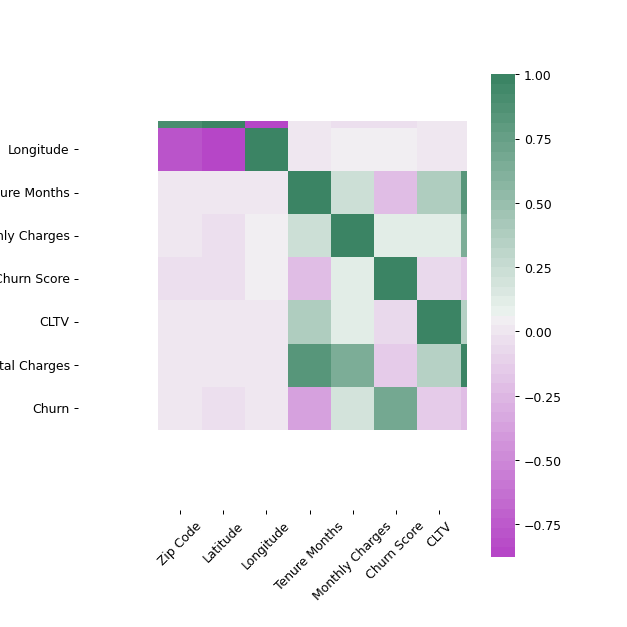

In [21]:
%matplotlib notebook
corr_plotter(num_df, y_train, 'Churn')

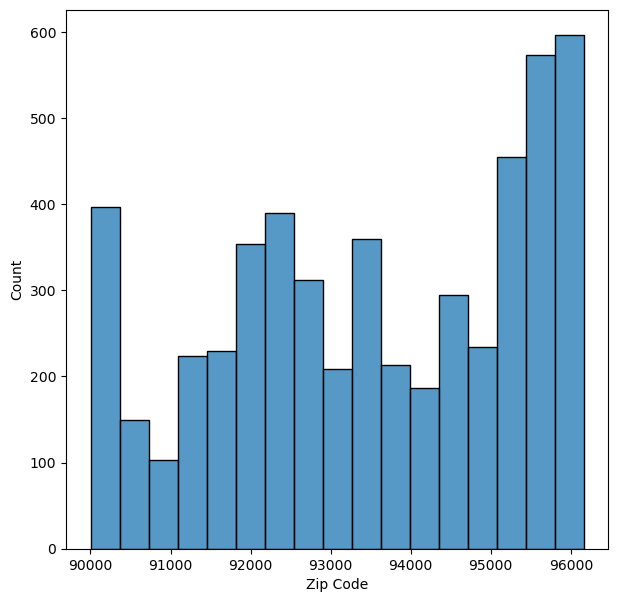

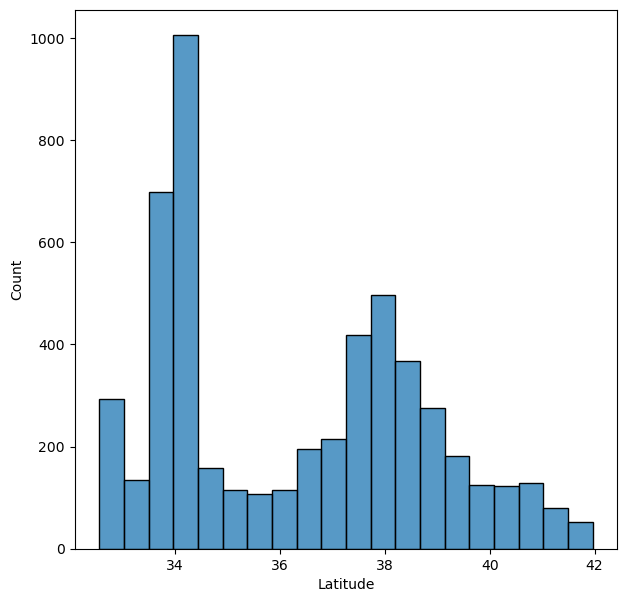

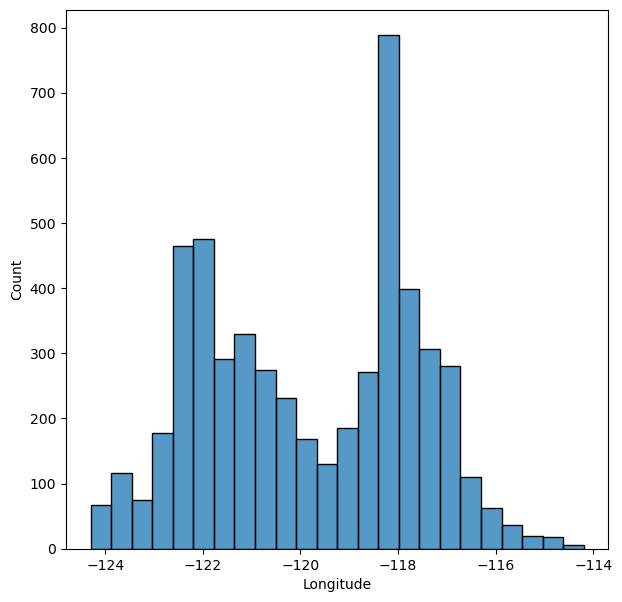

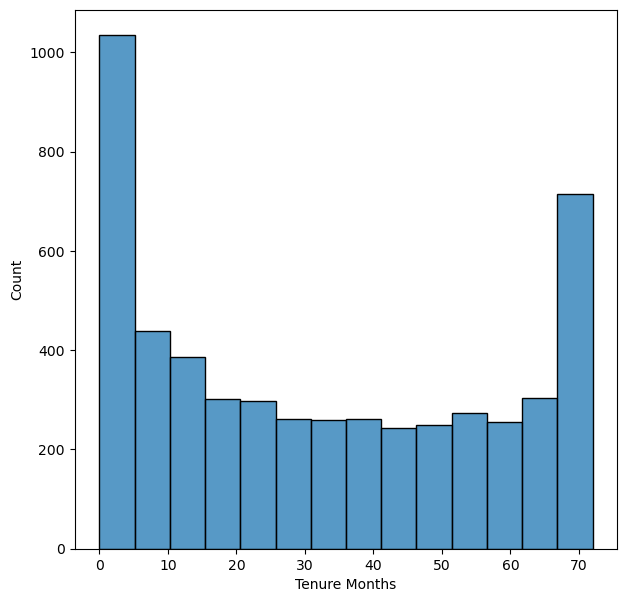

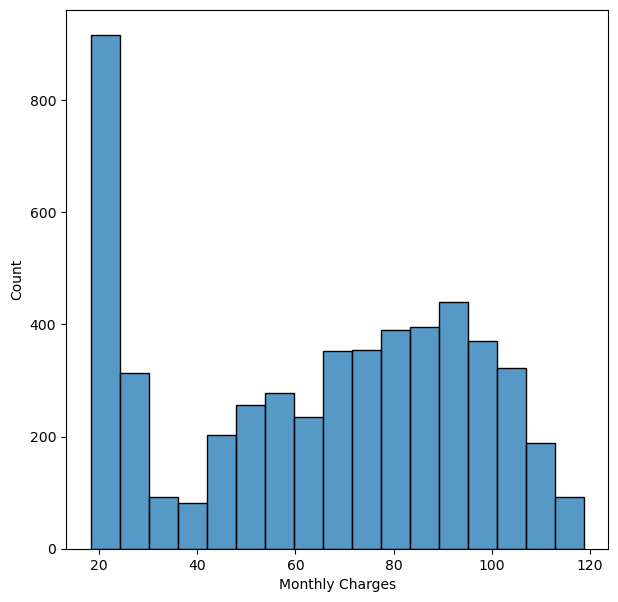

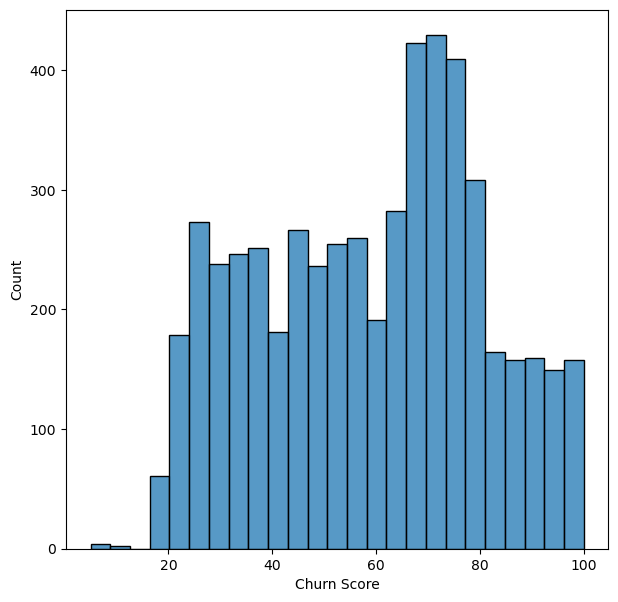

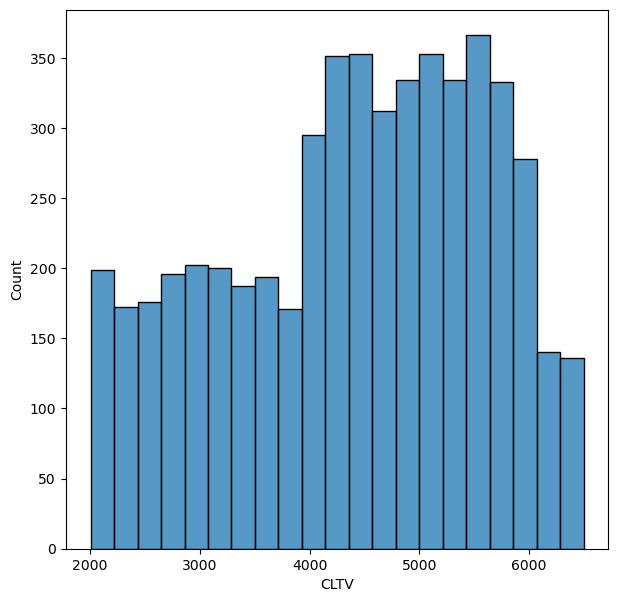

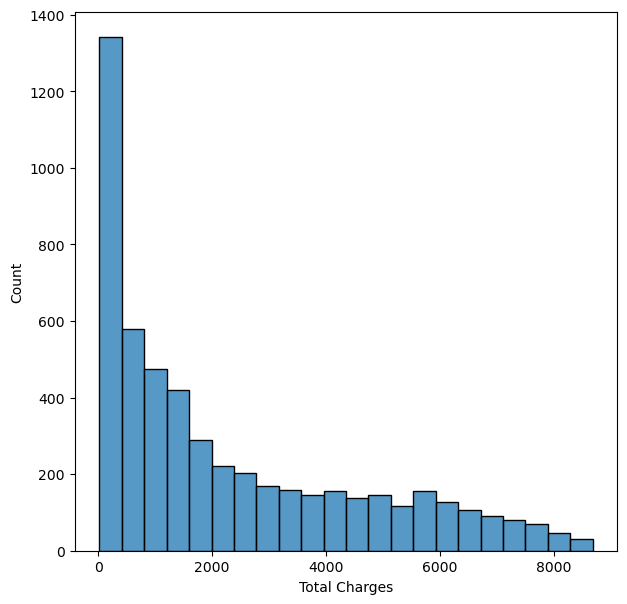

In [17]:
num_plotter(num_df)

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


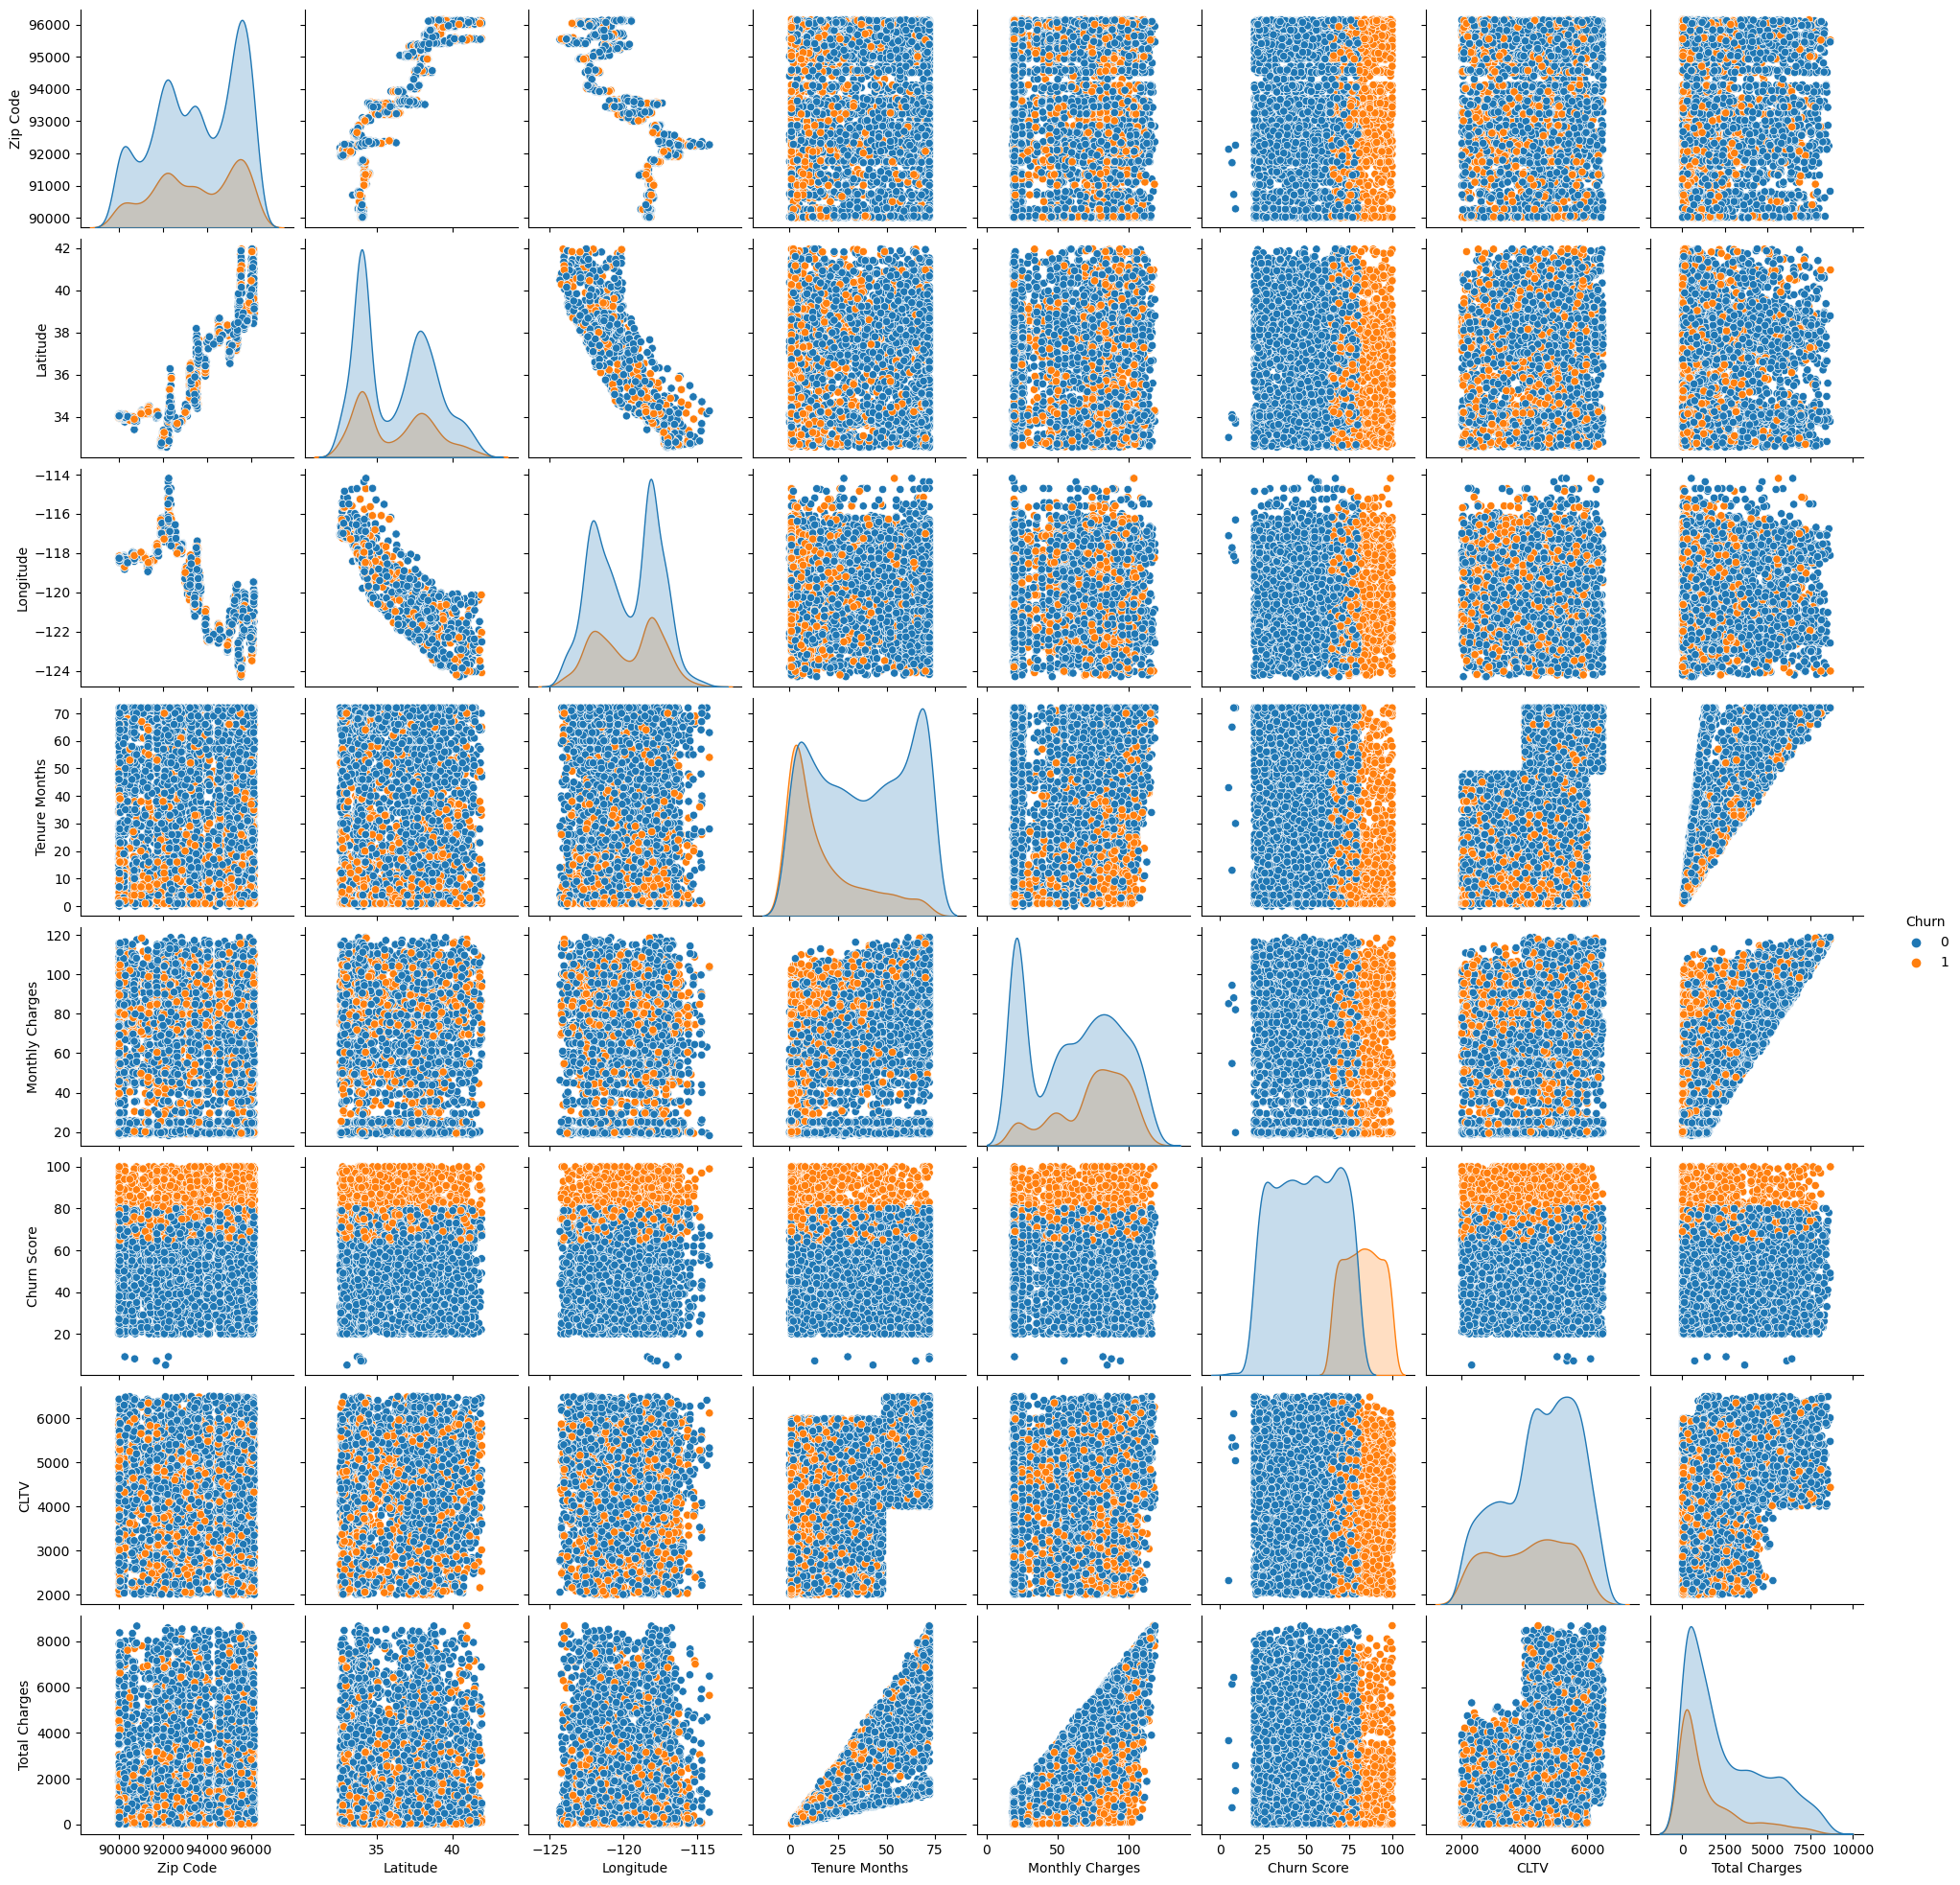

In [18]:
pairplotter(num_df,y_train,'Churn')

### Findings from analysing numericals
1. Churn score and tenure months seem to be the strongest indicators or churn likelihood
    - There is a strong positive correlation between churn and churn score
        - This means the higher the churn score of a data point, the more likely they are to churn
    - There is a decent negative correlation between tenure months and churn score
        - This means the higher the tenure months, the less likely is a customer to churn.

2. The least useful features seem to be zip code, longitude and latitude.
    A ranking should look something like this
    - Churn score
    - Tenure months
    - Total charges
    - Monthly charges
    - CLTV
    - Latitude
    - Longitude
    - Zip Code
    
3. The usefulness of Total charges may be as a result of its strong correlation with Tenure months

#### Engineer some features later?
#### Later try dropping some of the less useful features and see how the model performs

# Analysing Categoricals

In [19]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 3069 to 1344
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            5282 non-null   object
 1   State              5282 non-null   object
 2   City               5282 non-null   object
 3   Gender             5282 non-null   object
 4   Senior Citizen     5282 non-null   object
 5   Partner            5282 non-null   object
 6   Dependents         5282 non-null   object
 7   Phone Service      5282 non-null   object
 8   Multiple Lines     5282 non-null   object
 9   Internet Service   5282 non-null   object
 10  Online Security    5282 non-null   object
 11  Online Backup      5282 non-null   object
 12  Device Protection  5282 non-null   object
 13  Tech Support       5282 non-null   object
 14  Streaming TV       5282 non-null   object
 15  Streaming Movies   5282 non-null   object
 16  Contract           5282 non-null   object
 1

In [20]:
def value_count_plotter(df):
    for col in df.columns:
        if len(df[col].value_counts().index) > 20:
            plt.figure(figsize=(7,7))
            index_1 = df[col].value_counts().index[:20]
            ax = sns.barplot(x= index_1, y=df[col].value_counts()[index_1])
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
            continue
        else:
            plt.figure(figsize=(7,7))
            ax = sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts())
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [21]:
cat_df.drop('Churn Reason',axis=1, inplace=True)

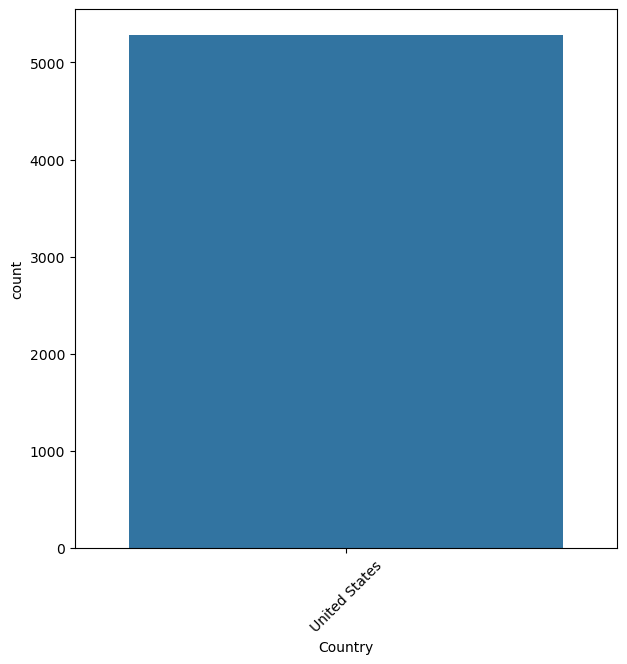

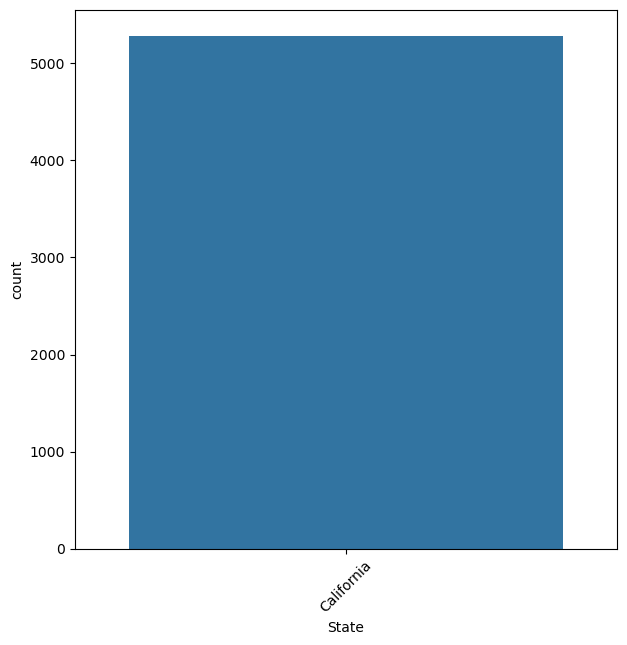

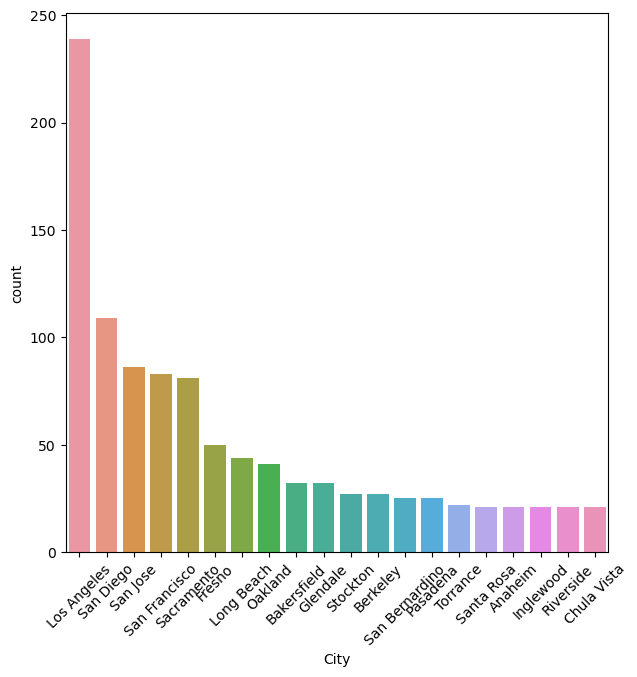

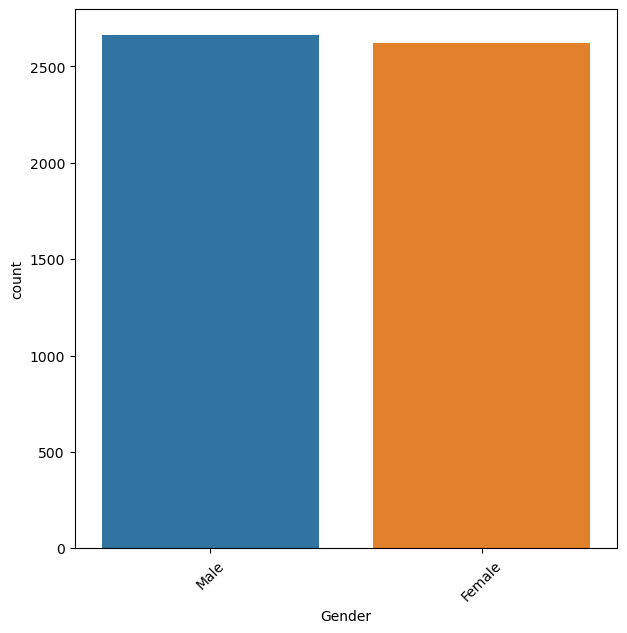

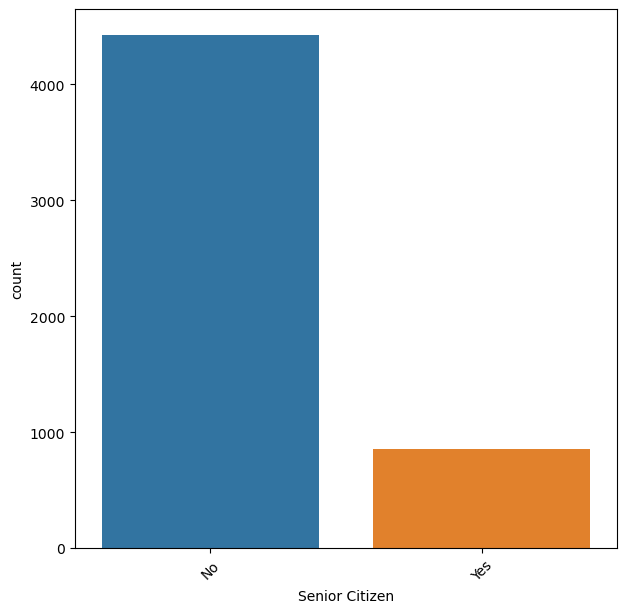

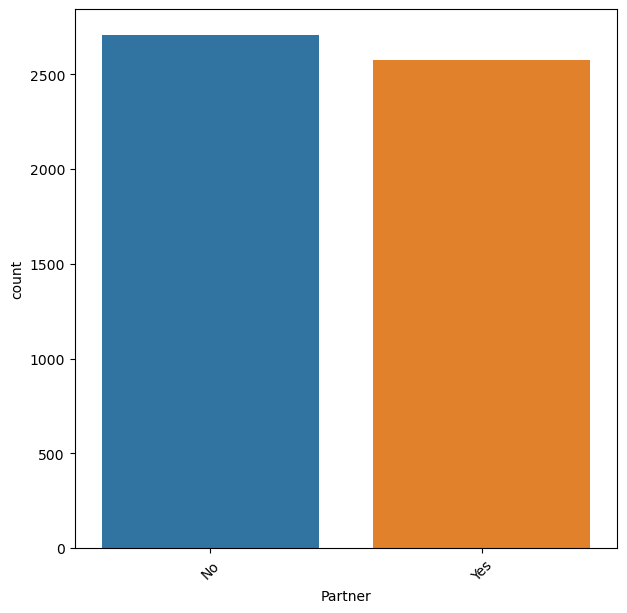

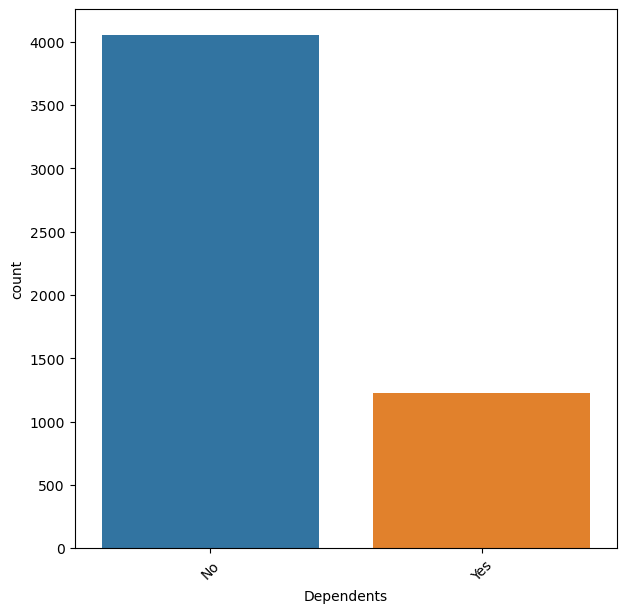

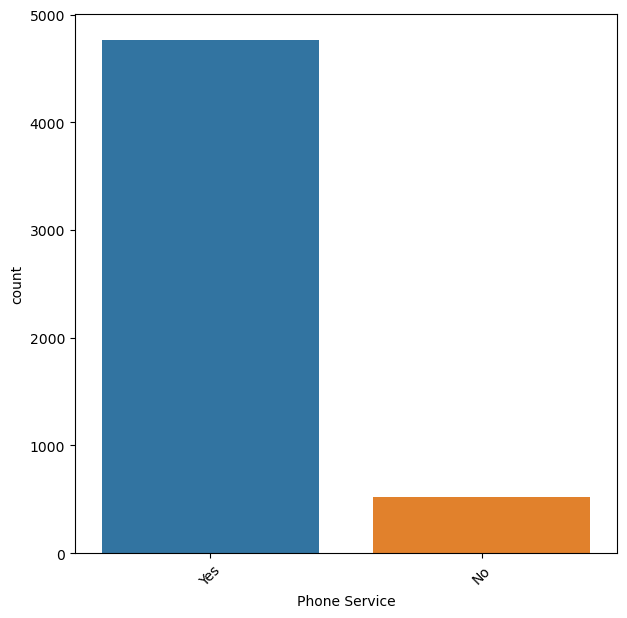

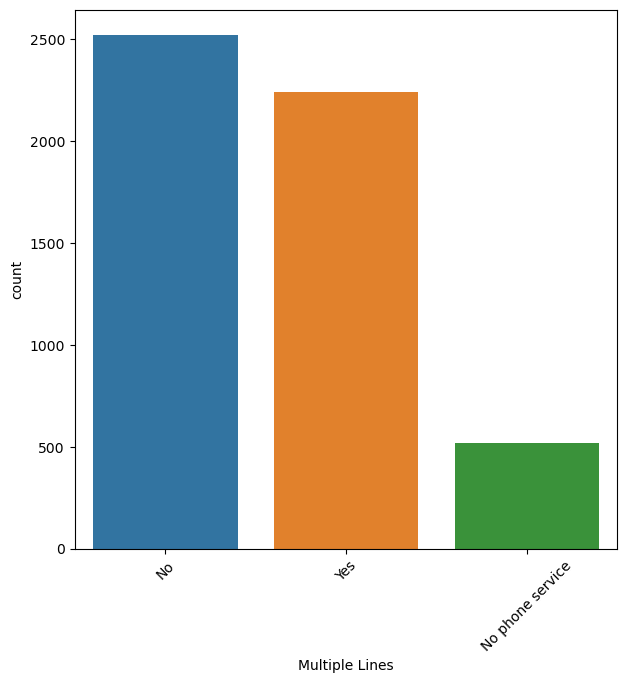

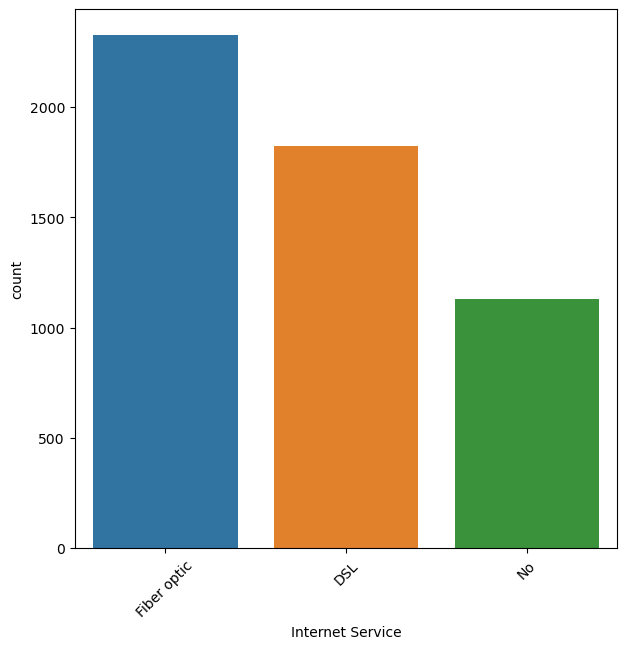

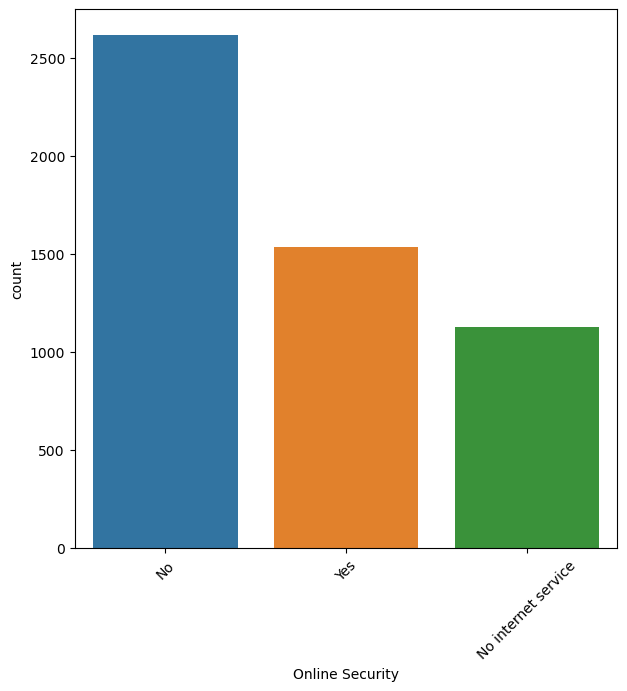

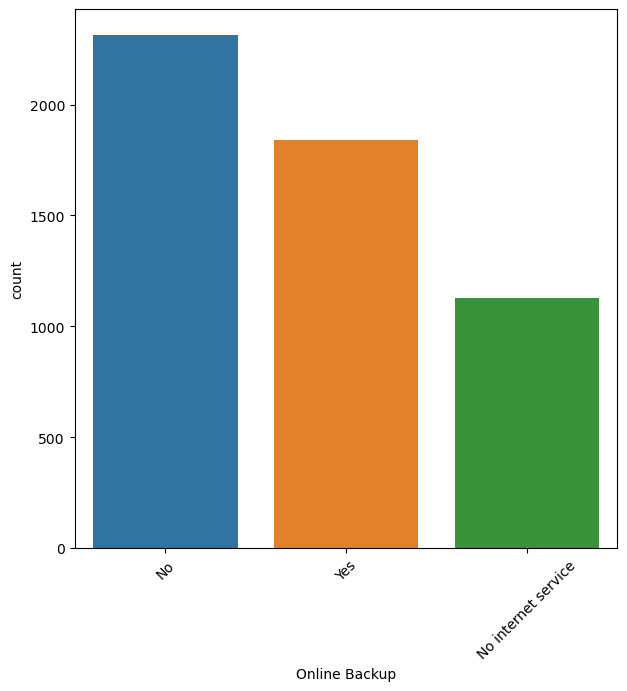

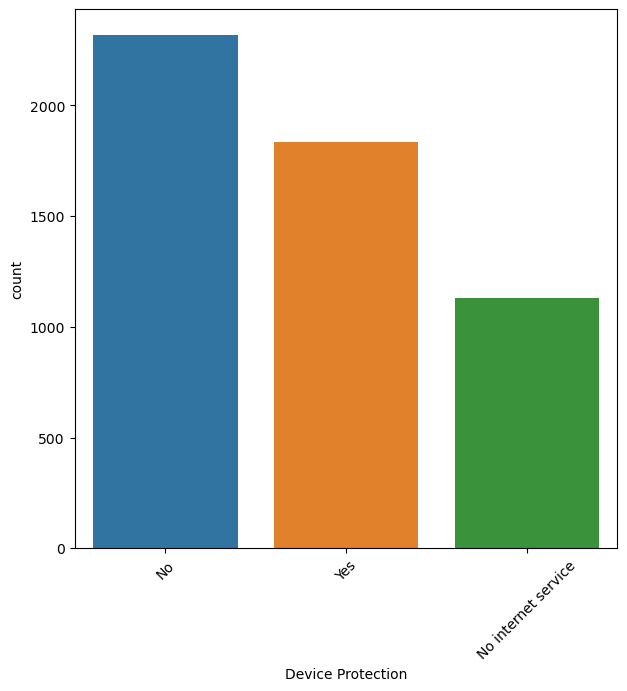

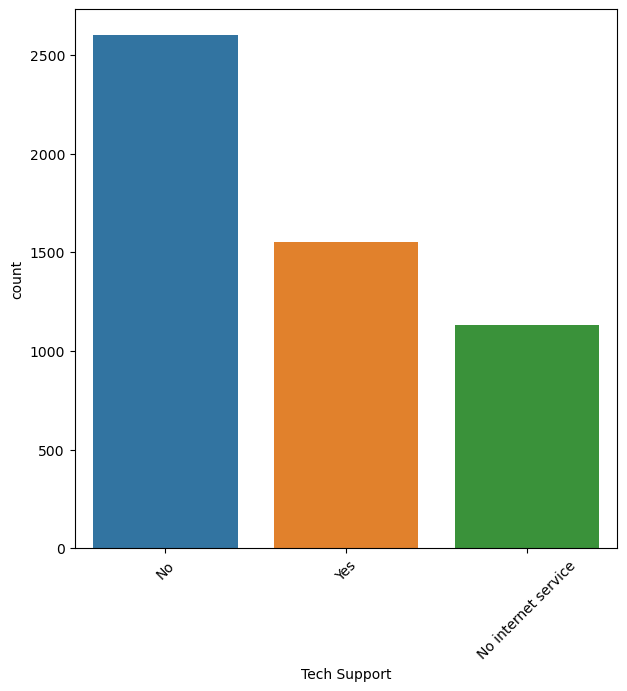

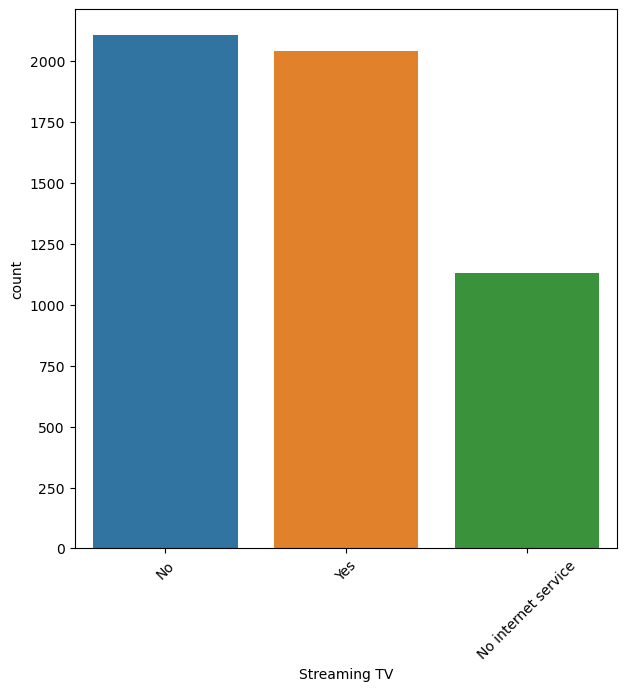

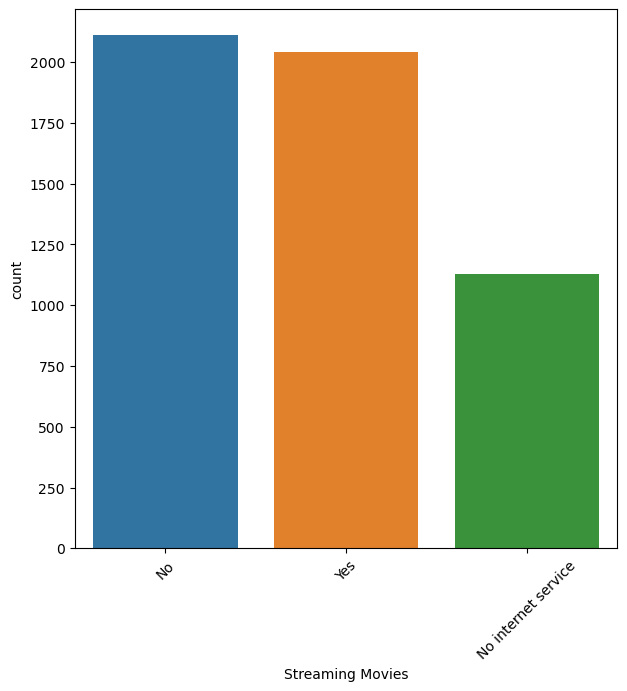

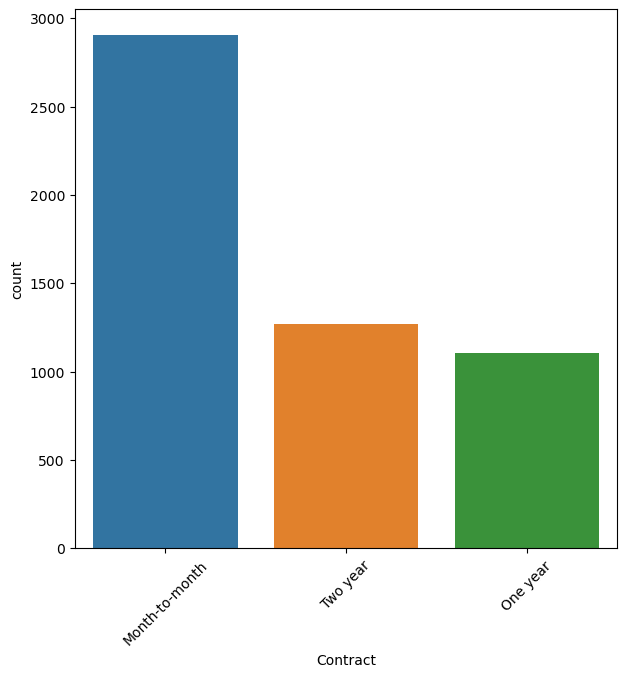

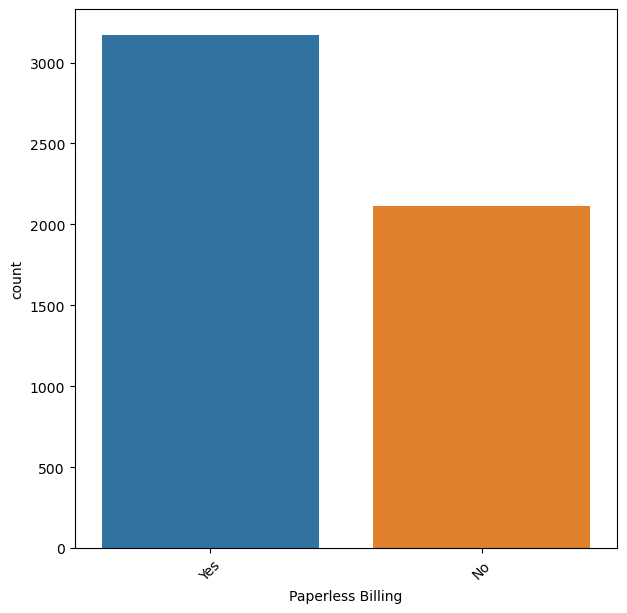

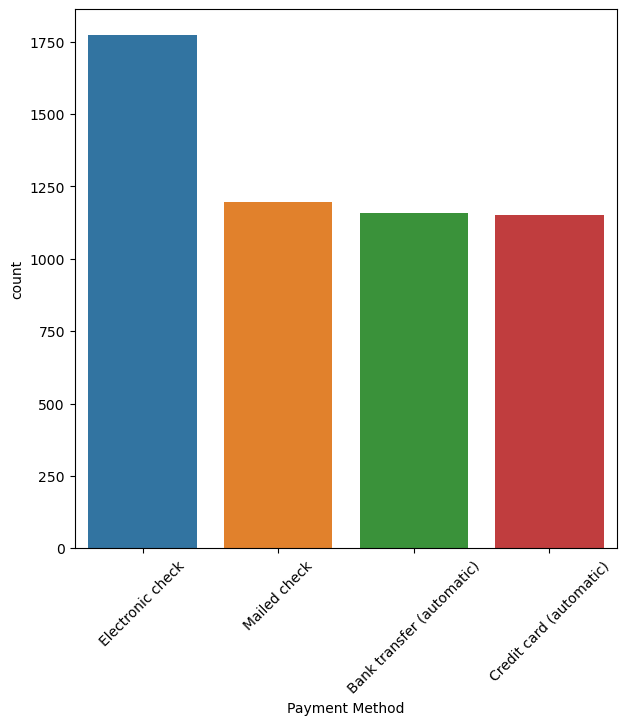

In [22]:
value_count_plotter(cat_df)

In [23]:
cat_df['City'].value_counts().index[:20]

Index(['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento',
       'Fresno', 'Long Beach', 'Oakland', 'Bakersfield', 'Glendale',
       'Stockton', 'Berkeley', 'San Bernardino', 'Pasadena', 'Torrance',
       'Santa Rosa', 'Anaheim', 'Inglewood', 'Riverside', 'Chula Vista'],
      dtype='object', name='City')

In [24]:
#cat_df['Churn Reason'].value_counts()

In [25]:
cat_df.columns

Index(['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

## Looking at pivot tables

### Things to check
1. First look at the relationship between each feature and churn



In [26]:
new_cat = cat_df.copy()
new_cat.loc[:,'Churn'] = data_df['Churn Value']
new_cat.loc[:,'Count'] = data_df['Count']

In [27]:
new_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 3069 to 1344
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            5282 non-null   object
 1   State              5282 non-null   object
 2   City               5282 non-null   object
 3   Gender             5282 non-null   object
 4   Senior Citizen     5282 non-null   object
 5   Partner            5282 non-null   object
 6   Dependents         5282 non-null   object
 7   Phone Service      5282 non-null   object
 8   Multiple Lines     5282 non-null   object
 9   Internet Service   5282 non-null   object
 10  Online Security    5282 non-null   object
 11  Online Backup      5282 non-null   object
 12  Device Protection  5282 non-null   object
 13  Tech Support       5282 non-null   object
 14  Streaming TV       5282 non-null   object
 15  Streaming Movies   5282 non-null   object
 16  Contract           5282 non-null   object
 1

In [28]:
new_cat.columns

Index(['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn', 'Count'],
      dtype='object')

## More pivot tables were looked at than shown here

In [29]:
new_cat.pivot_table(index = 'Churn', values='Count',aggfunc='count',columns='City').apply(lambda x: x/sum(x))
        #new_cat.pivot_table(index = 'Dependents', values='Count',aggfunc='count',columns='Churn').apply(lambda x: x/sum(x))

City     Acampo  Acton  Adelanto  Adin  Agoura Hills   Aguanga  Ahwahnee  \
Churn                                                                      
0      0.333333    NaN       NaN   NaN           0.5  0.666667      0.75   
1      0.666667    NaN       NaN   NaN           0.5  0.333333      0.25   

City   Alameda  Alamo  Albany  ...  Woody  Wrightwood  Yorba Linda  Yorkville  \
Churn                          ...                                              
0          NaN    NaN     0.5  ...    0.5         NaN         0.75        NaN   
1          NaN    NaN     0.5  ...    0.5         NaN         0.25        NaN   

City   Yosemite National Park  Yountville  Yuba City  Yucaipa  Yucca Valley  \
Churn                                                                         
0                    0.333333         NaN       0.75     0.75           NaN   
1                    0.666667         NaN       0.25     0.25           NaN   

City   Zenia  
Churn         
0       0.75  
1       0.25  

[2 rows x 1121 columns]

In [30]:
new_cat.pivot_table(index = 'Churn', values='Count',aggfunc='count',columns='Payment Method').apply(lambda x: x/sum(x))

Payment Method  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                                
0                                0.836207                 0.849957   
1                                0.163793                 0.150043   

Payment Method  Electronic check  Mailed check  
Churn                                           
0                       0.549915      0.798495  
1                       0.450085      0.201505

## Most promising categorical features
## from exploring pivot tables of all the
## categorical features

1. Contract: People with month to month contracts are much more likely to churn than people
with one year or two year contracts which could indicate that the people with longer contracts
are more committed. Also people with longer contracts probably want to see it out since theyve paid

2. Payment Method: People who use Electronic Check have a high likelihood of
churning, and the people who use other payment methods have a high likelihood
of not churning.

3. Online security: Of the people that use internet, most people don't
subscribe for online security. People who didn't subscribe for an online security
service and have internet have a much higher likelihood of churn than 
people who did and people with No internet service. Perhaps the online security is
an added incentive not to churn. That is people who bother to subscribe believe
its important and don't need to churn. Also its possible that they have a good
internet security service. Furthermore, the others who just use internet migh want to
try out other internet services. Once again, people without an internet service are
satisfied and don't need to try out other services.

4. Internet Service: People with fiber optic have a much stronger chance of churn than
people using DSL and people with No Internet service in that order. This could mean that
the fibre optic service isn't very good compared to other fiber optic services at that
price or to DSL. This follows because DSL doesn't have a high churn rate. Furthermore, this
could indicate that the people without internet service are comfortable and don't
necessarily need to churn and try another internet service.

5. Tech Support: For similar reasons as above

6. Senior citizen: Senior citizens have a considerably higher churn rate than non citizens.
However, in the dataset there are considerably more non senior citizens than senior citizens.

### Less promising features
** 
1. Online Backup: Similar reasons to online security
2. Device Protection: Similar thing to online security
3. Dependents: People without dependents are more likely to churn than people with dependents
4. Paperless Billing: People with PB are more likely to churn than people without PB
5. Partner: People without partners are more likely to churn than people with partners

### Least promising features
1. Streaming TV: People with and without streaming TV are just as likely to churn as one another.
2. Streaming Movies: Same as streaming TV


# Data Cleaning and Preprocessing

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 3069 to 1344
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5282 non-null   object 
 1   State              5282 non-null   object 
 2   City               5282 non-null   object 
 3   Zip Code           5282 non-null   int64  
 4   Latitude           5282 non-null   float64
 5   Longitude          5282 non-null   float64
 6   Gender             5282 non-null   object 
 7   Senior Citizen     5282 non-null   object 
 8   Partner            5282 non-null   object 
 9   Dependents         5282 non-null   object 
 10  Tenure Months      5282 non-null   int64  
 11  Phone Service      5282 non-null   object 
 12  Multiple Lines     5282 non-null   object 
 13  Internet Service   5282 non-null   object 
 14  Online Security    5282 non-null   object 
 15  Online Backup      5282 non-null   object 
 16  Device Protection  5282 no

In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 5742 to 1546
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1761 non-null   object 
 1   State              1761 non-null   object 
 2   City               1761 non-null   object 
 3   Zip Code           1761 non-null   int64  
 4   Latitude           1761 non-null   float64
 5   Longitude          1761 non-null   float64
 6   Gender             1761 non-null   object 
 7   Senior Citizen     1761 non-null   object 
 8   Partner            1761 non-null   object 
 9   Dependents         1761 non-null   object 
 10  Tenure Months      1761 non-null   int64  
 11  Phone Service      1761 non-null   object 
 12  Multiple Lines     1761 non-null   object 
 13  Internet Service   1761 non-null   object 
 14  Online Security    1761 non-null   object 
 15  Online Backup      1761 non-null   object 
 16  Device Protection  1761 no

In [33]:
X_train

Country       State         City  Zip Code   Latitude   Longitude  \
3069  United States  California     Madeline     96119  41.042003 -120.506086   
511   United States  California      Bonsall     92003  33.290907 -117.202895   
2601  United States  California    Pittsburg     94565  38.006047 -121.916834   
1856  United States  California      Cabazon     92230  33.929812 -116.760580   
606   United States  California       Armona     93202  36.315979 -119.710852   
...             ...         ...          ...       ...        ...         ...   
1800  United States  California  North Hills     91343  34.238802 -118.482296   
4650  United States  California  Pinon Hills     92372  34.459322 -117.629729   
6489  United States  California     Kneeland     95549  40.664483 -123.865325   
6934  United States  California  West Covina     91790  34.066964 -117.937007   
1344  United States  California       Duarte     91010  34.145695 -117.959820   

      Gender Senior Citizen Partner Dependents  ...         Streaming TV  \
3069  Female            Yes     Yes         No  ...                  Yes   
511     Male             No      No         No  ...                   No   
2601  Female             No     Yes        Yes  ...  No internet service   
1856    Male             No      No         No  ...                   No   
606   Female             No      No         No  ...                  Yes   
...      ...            ...     ...        ...  ...                  ...   
1800  Female             No     Yes         No  ...                   No   
4650    Male            Yes     Yes        Yes  ...                  Yes   
6489  Female             No     Yes        Yes  ...                   No   
6934  Female             No     Yes         No  ...                   No   
1344    Male             No     Yes         No  ...                   No   

         Streaming Movies        Contract Paperless Billing  \
3069                   No  Month-to-month               Yes   
511                    No  Month-to-month               Yes   
2601  No internet service        Two year                No   
1856                   No  Month-to-month               Yes   
606                    No  Month-to-month               Yes   
...                   ...             ...               ...   
1800                  Yes        Two year                No   
4650                  Yes        One year               Yes   
6489                   No  Month-to-month               Yes   
6934                   No  Month-to-month               Yes   
1344                   No        One year               Yes   

                 Payment Method Monthly Charges Churn Score  CLTV  \
3069           Electronic check           90.05          39  3792   
511   Bank transfer (automatic)           49.55          80  5005   
2601  Bank transfer (automatic)           23.75          67  4923   
1856               Mailed check           35.45          70  2095   
606            Electronic check           85.65          96  3223   
...                         ...             ...         ...   ...   
1800           Electronic check           47.85          66  6347   
4650           Electronic check           80.85          76  6090   
6489           Electronic check           44.95          54  3752   
6934           Electronic check           29.05          35  3306   
1344           Electronic check           49.75          75  5651   

                                   Churn Reason Total Charges  
3069                                        NaN       2627.20  
511                  Attitude of support person       1210.40  
2601                                        NaN       1679.25  
1856                                      Moved        106.85  
606                  Attitude of support person        321.65  
...                                         ...           ...  
1800               Competitor made better offer       3147.50  
4650                        

In [34]:
np.divide(X_train['Churn Reason'].isna().sum(),len(X_train['Country']))

0.7345702385460053

The column Churn Reason has too many null values hence it is dropped

In [35]:
X_train.drop('Churn Reason',axis=1, inplace=True)

In [36]:
print(f'Here are the cat_df columns {cat_df.columns}\n')
print('Here are the num_df columns',num_df.columns)

Here are the cat_df columns Index(['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

Here are the num_df columns Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Churn Score', 'CLTV', 'Total Charges'],
      dtype='object')


In [37]:
y_train.value_counts()

Churn Value
0    3880
1    1402
Name: count, dtype: int64

y_train will likely need resampling since there are about 2.5 times more non churns than churns. Will test out the models with regular and resampled data to see

In [76]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('scaler_1',StandardScaler()),('imputer',SimpleImputer(strategy='mean'))])
cat_pipeline = Pipeline([('encoder_1',OneHotEncoder(handle_unknown='ignore'))])
full_pipeline = ColumnTransformer([('nums',num_pipeline, num_df.columns),('cats',cat_pipeline,cat_df.columns)])

In [70]:
X_final = full_pipeline.fit_transform(X_train)

### Resampling

In [71]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [41]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state = 42)
X_undersampled, y_undersampled = ros.fit_resample(X_train, y_train)

In [77]:
X_final_oversampled = full_pipeline.fit_transform(X_oversampled)
#X_final_undersampled = full_pipeline.fit_transform(X_undersampled)

# Model Training

In [43]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

### Results for Regular data

In [44]:
models = [LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(), XGBClassifier(), LinearSVC()]
for model in models:
    model_score = cross_val_predict(model, X_final, y_train, cv=3)
    print(f'For {type(model).__name__} the f1_score is {f1_score(y_train, model_score)}')

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

For LogisticRegression the f1_score is 0.8498037816625045
For SGDClassifier the f1_score is 0.8174715909090908
For DecisionTreeClassifier the f1_score is 0.8416547788873039
For XGBClassifier the f1_score is 0.863376251788269


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For LinearSVC the f1_score is 0.8329794762915782


#### Basically all models look good right off the bat, lets try using stratified kfold to split the data and check again

In [45]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfold.split(X_final, y_train):
    X_train_folds = X_final[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_folds = X_final[test_index]
    y_test_folds = y_train.iloc[test_index]


In [46]:
for model in models:
    model.fit(X_train_folds, y_train_folds)
    predictions = model.predict(X_test_folds)
    print(f'For {type(model).__name__} the f1_score is {f1_score(y_test_folds, predictions)}')

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For LogisticRegression the f1_score is 0.8568329718004338
For SGDClassifier the f1_score is 0.8194130925507901
For DecisionTreeClassifier the f1_score is 0.8403908794788273
For XGBClassifier the f1_score is 0.8605405405405405
For LinearSVC the f1_score is 0.8344086021505377


This didn't make much of a difference hence going forward, cross_val_predict can be used

### Results with resampled data

#### Oversampled data

In [47]:
for model in models:
    model_score = cross_val_predict(model, X_final_oversampled, y_oversampled, cv=3)
    print(f'For {type(model).__name__} the f1_score is {f1_score(y_oversampled, model_score)}')

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

For LogisticRegression the f1_score is 0.9307556229466768
For SGDClassifier the f1_score is 0.9382560483870968
For DecisionTreeClassifier the f1_score is 0.9638826185101581
For XGBClassifier the f1_score is 0.9611528822055138
For LinearSVC the f1_score is 0.9391041771514846


#### Undersampled data

In [48]:
for model in models:
    model_score = cross_val_predict(model, X_final_undersampled, y_undersampled, cv=3)
    print(f'For {type(model).__name__} the f1_score is {f1_score(y_undersampled, model_score)}')

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

For LogisticRegression the f1_score is 0.9156966490299823
For SGDClassifier the f1_score is 0.8956706884315118
For DecisionTreeClassifier the f1_score is 0.9025787965616046
For XGBClassifier the f1_score is 0.9147506190307747
For LinearSVC the f1_score is 0.9108280254777069


### Base score conclusions

1. Oversampled data gave the best results hence moving forward it will be used to train the final model
2. Across the board for oversampled data, results are very good. The best is XGBoost (unsurprisingly) followed by DecisionTreeClassifier then LinearSVC then SGDClassifier and finally LogisticRegression.
3. Before resampling, XGBoost was still the best however LogisticRegression was second. The same is true with undersampled data. This tells us that with less data (that may be skewed) Xgboost still does the best but logistic regression is second.

# Hyperparameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

#### First testing out random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
predictions_forest = cross_val_predict(forest, X_final, y_train, cv=3)
print(f'The score for {type(forest).__name__} is {f1_score(y_train, predictions_forest)}')

The score for RandomForestClassifier is 0.7899561578318056


In [51]:
param_grid = [{LogisticRegression():{'C':[0.1,1,10]}},{DecisionTreeClassifier():{'max_depth':[2,4,6],
                    'min_samples_split':[100,200,500],'min_samples_leaf':[100,500,1000],
                    'max_leaf_nodes':[10,50,100],'max_features':[2,7,15,27]}},{LinearSVC():{'C':[0.001,0.01,0.1,1,10,100,1000],
                    'loss':['hinge','squared hinge']}}]

def GridSearch(params, X, y):
    """ This function accepts a parameter grid of form *Dictionary - model:parameters,
    model: parameters... and trains them then returns the best score as well as best parameters
    """
    
    for item in params:
        for model, param in item.items():
            print(f'For: {type(model).__name__}')
            grid = GridSearchCV(model, param, cv=5, scoring='f1')
            grid.fit(X,y)
            print(f'Best_score: {grid.best_score_}')
            print(f'Best_parameters: {grid.best_params_}\n')

### Trial 1

In [52]:
GridSearch(param_grid, X_final_oversampled, y_oversampled)

For: LogisticRegression


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best_score: 0.940334259938979
Best_parameters: {'C': 10}

For: DecisionTreeClassifier
Best_score: 0.7309455812381314
Best_parameters: {'max_depth': 6, 'max_features': 27, 'max_leaf_nodes': 10, 'min_samples_leaf': 100, 'min_samples_split': 500}

For: LinearSVC


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\sit

Best_score: 0.9462013334454701
Best_parameters: {'C': 10, 'loss': 'hinge'}



C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Trial 2

In [53]:
param_grid_2 = [{LogisticRegression():{'C':[10,20,50]}},{DecisionTreeClassifier():{'max_depth':[2,4,5,6],
                    'min_samples_split':[10,50,100],'min_samples_leaf':[10,50,100],
                    'max_leaf_nodes':[50,100,200]}},{LinearSVC():{'C':[10,20,30],
                    'loss':['hinge','squared hinge']}}]

GridSearch(param_grid_2, X_final_oversampled, y_oversampled)

For: LogisticRegression


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best_score: 0.9422458487306811
Best_parameters: {'C': 20}

For: DecisionTreeClassifier
Best_score: 0.9323798480780863
Best_parameters: {'max_depth': 6, 'max_leaf_nodes': 50, 'min_samples_leaf': 10, 'min_samples_split': 100}

For: LinearSVC


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\sit

Best_score: 0.9464216334670524
Best_parameters: {'C': 10, 'loss': 'hinge'}



C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Trial 3

In [54]:
param_grid_3 = [{LogisticRegression(random_state=42):{'C':[9,10,11]}},{DecisionTreeClassifier(random_state=42):{'max_depth':[6,7,8],
                    'min_samples_split':[9,10,11],'min_samples_leaf':[9,10,11],
                    'max_leaf_nodes':[49,50,51]}},{LinearSVC(random_state=42):{'C':[9,10,11],
                    'loss':['hinge','squared hinge']}}]

GridSearch(param_grid_3, X_final_oversampled, y_oversampled)

For: LogisticRegression


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best_score: 0.9405410983470125
Best_parameters: {'C': 11}

For: DecisionTreeClassifier
Best_score: 0.9399120129644016
Best_parameters: {'max_depth': 8, 'max_leaf_nodes': 49, 'min_samples_leaf': 9, 'min_samples_split': 9}

For: LinearSVC


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\sit

Best_score: 0.9464804853180253
Best_parameters: {'C': 11, 'loss': 'hinge'}



C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Trial 4

In [55]:
param_grid_4 = [{LogisticRegression(random_state=42):{'C':[8,9,10,11,12]}},{DecisionTreeClassifier(random_state=42):{'max_depth':[8,9,10,11],
                    'min_samples_split':[5,6,7,8,9],'min_samples_leaf':[5,6,7,8,9],
                    'max_leaf_nodes':[40,45,49]}},{LinearSVC(random_state=42):{'C':[11,12,13,14,15],
                    'loss':['hinge','squared hinge']}}]

GridSearch(param_grid_4, X_final_oversampled, y_oversampled)

For: LogisticRegression


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best_score: 0.9405410983470125
Best_parameters: {'C': 11}

For: DecisionTreeClassifier
Best_score: 0.9461636023727799
Best_parameters: {'max_depth': 11, 'max_leaf_nodes': 49, 'min_samples_leaf': 6, 'min_samples_split': 5}

For: LinearSVC


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\sit

Best_score: 0.947053800663026
Best_parameters: {'C': 15, 'loss': 'hinge'}



C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Trial 5

In [56]:
param_grid_5 = [{LogisticRegression(random_state=42):{'C':[5,6,7,8,9,10]}},{DecisionTreeClassifier(random_state=42):{'max_depth':[11,15,20],
                    'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5],
                    'max_leaf_nodes':[20,30,35,40]}},{LinearSVC(random_state=42):{'C':[11,12,13,14,15],
                    'loss':['hinge','squared hinge']}}]

GridSearch(param_grid_5, X_final_oversampled, y_oversampled)

For: LogisticRegression


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best_score: 0.9404120722900625
Best_parameters: {'C': 6}

For: DecisionTreeClassifier


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()

Best_score: 0.9454692313706341
Best_parameters: {'max_depth': 11, 'max_leaf_nodes': 40, 'min_samples_leaf': 5, 'min_samples_split': 2}

For: LinearSVC


C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\191204026\AppData\Local\anaconda3\Lib\sit

Best_score: 0.947053800663026
Best_parameters: {'C': 15, 'loss': 'hinge'}



C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## ENSEMBLING WITH VOTING CLASSIFIER

### Will use overgrown decision tree as well as xgboost tree because they seem to perform better than regularised models which is odd.

In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

normal_tree = DecisionTreeClassifier(random_state = 42)
normal_xg = XGBClassifier(seed = 42)
Log_reg = LogisticRegression(C = 8)
Lin_svc = SVC(kernel = 'linear',random_state = 42, C = 15, probability = True)

Vote = VotingClassifier(
    estimators = [('n_t',normal_tree),('n_x',normal_xg),('l_r',Log_reg),('l_s',Lin_svc)], voting = 'soft')

skfold_2 = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfold.split(X_final_oversampled, y_oversampled):
    X_train_folds = X_final_oversampled[train_index]
    y_train_folds = y_oversampled.iloc[train_index]
    X_test_folds = X_final_oversampled[test_index]
    y_test_folds = y_oversampled.iloc[test_index]

Vote.fit(X_train_folds, y_train_folds)
predictions = Vote.predict(X_test_folds)
print(f'For soft voting classifier, the f1_score is {f1_score(y_test_folds, predictions)}')

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For soft voting classifier, the f1_score is 0.9621212121212122


# Final results on test set

In [62]:
X_test.drop('Churn Reason',axis=1, inplace=True)

In [78]:
X_test_final = full_pipeline.transform(X_test)
#X_test_final = full_pipeline.transform(X_test)

In [75]:
X_test

Country       State            City  Zip Code   Latitude  \
5742  United States  California          Bonita     91902  32.671170   
1270  United States  California        Big Bend     96011  41.096569   
539   United States  California       San Diego     92139  32.677716   
2792  United States  California  Clearlake Oaks     95423  39.071160   
376   United States  California         Winters     95694  38.578604   
...             ...         ...             ...       ...        ...   
2469  United States  California          Dunlap     93621  36.789213   
1523  United States  California          Madera     93638  37.004068   
5817  United States  California  Cathedral City     92234  33.829583   
1883  United States  California     Los Angeles     90023  34.017697   
1546  United States  California       Sunnyvale     94089  37.421633   

       Longitude  Gender Senior Citizen Partner Dependents  ...  \
5742 -117.002320  Female             No     Yes        Yes  ...   
1270 -121.879082  Female            Yes      No         No  ...   
539  -117.047666  Female             No     Yes         No  ...   
2792 -122.598542    Male             No      No         No  ...   
376  -122.024579    Male             No     Yes         No  ...   
...          ...     ...            ...     ...        ...  ...   
2469 -119.140338    Male             No      No         No  ...   
1523 -119.930027  Female            Yes     Yes         No  ...   
5817 -116.474131    Male             No     Yes        Yes  ...   
1883 -118.200577    Male             No     Yes         No  ...   
1546 -122.009613  Female             No      No         No  ...   

             Tech Support         Streaming TV     Streaming Movies  \
5742  No internet service  No internet service  No internet service   
1270                   No                   No                   No   
539                    No                  Yes                  Yes   
2792  No internet service  No internet service  No internet service   
376                    No                  Yes                  Yes   
...                   ...                  ...                  ...   
2469                  Yes                   No                   No   
1523                   No                   No                  Yes   
5817                   No                   No                  Yes   
1883  No internet service  No internet service  No internet service   
1546                   No                   No                   No   

            Contract Paperless Billing             Payment Method  \
5742        Two year               Yes    Credit card (automatic)   
1270  Month-to-month               Yes           Electronic check   
539   Month-to-month                No           Electronic check   
2792  Month-to-month                No           Electronic check   
376   Month-to-month               Yes           Electronic check   
...              ...               ...                        ...   
2469        One year                No    Credit card (automatic)   
1523        One year               Yes    Credit card (automatic)   
5817        Two year                No  Bank transfer (automatic)   
1883        One year                No  Bank transfer (automatic)   
1546  Month-to-month                No  Bank transfer (automatic)   

     Monthly Charges Churn Score  CLTV Total Charges  
5742           20.15          67  5219       1411.20  
1270           70.40          67  2491        204.70  
539            88.15          79  2524       1390.60  
2792           19.45          64  5820         19.45  
376           101.10          97  2055       1504.05  
...              ...         ...   ...           ...  
2469           81.70          68  4850       2548.65  
1523           96.55          86  5957       6581.90  
5817           69.70          22  4975       3686.05  
1883           19.80          77  5279        202.25  
1546           70.00          81  2928        153.05  


In [79]:
X_test_final

<1761x1174 sparse matrix of type '<class 'numpy.float64'>'
	with 47515 stored elements in Compressed Sparse Row format>

In [73]:
X_final_oversampled

<7760x1174 sparse matrix of type '<class 'numpy.float64'>'
	with 209520 stored elements in Compressed Sparse Row format>

In [95]:
new_tree = DecisionTreeClassifier(random_state = 42,max_depth= 11, max_leaf_nodes= 40, min_samples_leaf= 5, min_samples_split= 2)
normal_xg1 = XGBClassifier(seed = 42)
Log_reg1 = LogisticRegression(C = 8)
Lin_svc1 = SVC(kernel = 'linear',random_state = 42, C = 15, probability = True)

Vote = VotingClassifier(
    estimators = [('n_t',new_tree),('n_x',normal_xg1),('l_r',Log_reg1),('l_s',Lin_svc1)], voting = 'soft')
models = [Vote, DecisionTreeClassifier(random_state = 42,max_depth= 11, max_leaf_nodes= 40, min_samples_leaf= 5, min_samples_split= 2), XGBClassifier(seed = 42), DecisionTreeClassifier(random_state=42)]
for model in models:
    model.fit(X_final_oversampled, y_oversampled)
    score = model.predict(X_test_final)
    print(f'The score for {type(model).__name__} is: {f1_score(y_test, score)}')

C:\Users\191204026\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The score for VotingClassifier is: 0.8471794871794872
The score for DecisionTreeClassifier is: 0.8456104944500504
The score for XGBClassifier is: 0.8571428571428572
The score for DecisionTreeClassifier is: 0.8217716115261474


# Evaluating based on f1 score
### Best Results Xgboost: 0.857
### 2nd best soft voting classifier: 0.847